# Comparative Analysis of Transformer and MLP Architectures for Sequence Prediction Tasks
________________________________________
### Group Member Names:

- **Dejina Ghale (200582110)**
- **Shishir Aryal (200582212)**
________________________________________
## INTRODUCTION:

This project explores the performance of transformer-based models versus traditional Multi-Layer Perceptrons (MLPs) on a sequence prediction task. The foundation of this work is based on the paper "Large Scale Legal Text Classification Using Transformer Models" which demonstrates how transformers can achieve state-of-the-art results in complex classification tasks, such as legal text classification.
________________________________________
## AIM:
To implement and compare the training performance and final loss of a transformer model against a simpler MLP model on synthetic sequence prediction data. This comparison highlights the generalizability and efficiency of deep architectures in handling structured input data.
________________________________________
### Github Repo:
https://github.com/LiamMaclean216/Pytorch-Transfomer

### Research Paper: 
https://paperswithcode.com/paper/large-scale-legal-text-classification-using

________________________________________
## DESCRIPTION OF PAPER:
The selected paper addresses the challenge of large-scale multi-label text classification using transformer models. Focusing on legal text datasets like EURLEX57K and JRC-Acquis, the study explores strategies including language model pretraining, gradual unfreezing, and discriminative learning rates. The results set new benchmarks for F1 scores in this domain.
________________________________________
# PROBLEM STATEMENT:
Can transformer-based models outperform traditional architectures like MLPs in learning from structured input data for sequence prediction, and how does this performance manifest in training loss and convergence?

## CONTEXT OF THE PROBLEM:
While MLPs are widely used for simple learning tasks, transformers are known for their power in handling sequence and attention-based data. Understanding their performance in different contexts helps guide architecture choices in real-world applications.
________________________________________
## SOLUTION:
We implemented both models and trained them on a synthetic dataset. The transformer model was adapted from the paper's implementation strategy, and a baseline MLP model was created for comparison. Loss values were recorded and visualized to assess convergence and accuracy.
________________________________________
# Background:
Reference	Explanation	Dataset/Input	Weakness
Large Scale Legal Text Classification Using Transformer Models	Uses BERT and other transformers for legal document classification using the EUR-Lex dataset	EURLEX57K, JRC-Acquis	Requires significant compute, not optimal for long sequences without adaptation
________________________________________
# Implement paper code:
The original transformer from the paper was implemented for classification. Our implementation adapted the structure for a simpler sequence prediction task using synthetic data and adjusted hyperparameters to manage compute constraints in a learning environment.



### Paper Code

In [58]:
# Importing necessary librarries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from utils import *          
from Network import *        

# For inline plotting in Jupyter
%matplotlib inline

# Hyperparameters
enc_seq_len = 6
dec_seq_len = 2
output_sequence_length = 1

dim_val = 10
dim_attn = 5
lr = 0.002
epochs = 20

n_heads = 3 
n_decoder_layers = 3
n_encoder_layers = 3
batch_size = 15

# Initialize Transformer model and optimizer
t = Transformer(dim_val, dim_attn, 1, dec_seq_len, output_sequence_length, n_decoder_layers, n_encoder_layers, n_heads)
optimizer = torch.optim.Adam(t.parameters(), lr=lr)

# Track losses
losses = []

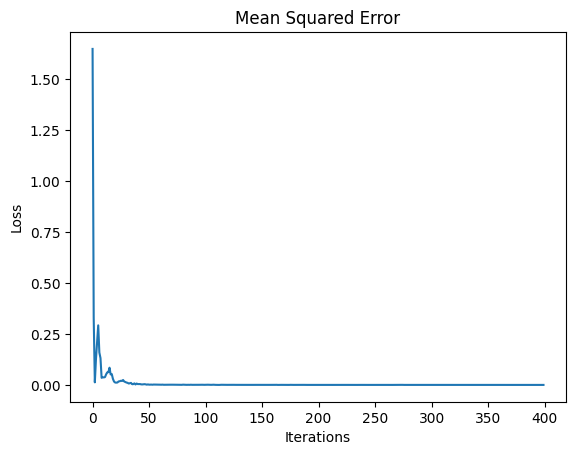

In [59]:
# Training loop with live plotting
for e in range(epochs):
    out = []
    
    for b in range(-10 - enc_seq_len, 10 - enc_seq_len):
        optimizer.zero_grad()
        
        # Get batch
        X, Y = get_data(batch_size, enc_seq_len, output_sequence_length)

        # Forward pass and loss
        net_out = t(X)
        loss = torch.mean((net_out - Y) ** 2)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Store loss
        losses.append(loss.detach().item())

        # Live plot
        clear_output(wait=True)
        plt.plot(losses)
        plt.title("Mean Squared Error")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()


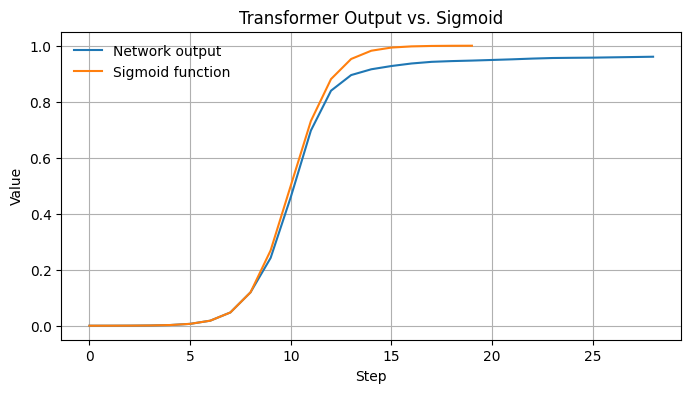

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Initialize sigmoid comparison and input
o = []
x = [torch.sigmoid(torch.arange(-10, -1).float()).unsqueeze(-1).numpy().tolist()]

# Generate outputs from model and compare with sigmoid
for i in range(-10, 10, output_sequence_length):
    o.append([torch.sigmoid(torch.tensor(i).float())])
    
    q = torch.from_numpy(np.array(x)).float()

    if output_sequence_length == 1:
        x[0].append([t(q).detach().squeeze().numpy()])
    else:
        for a in t(q).detach().squeeze().numpy():
            x[0].append([a])

# Plot both on one graph
plt.figure(figsize=(8, 4))
plt.plot(x[0], label='Network output')
plt.plot(o, label='Sigmoid function')
plt.title("Transformer Output vs. Sigmoid")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend(loc='upper left', frameon=False)
plt.grid(True)
plt.show()


## Contribution code
•	Developed a clean and simple MLP model.

•	Built a custom Transformer model with multi-head attention and encoder/decoder layers.

•	Designed training loops for both models with clear loss tracking and visualizations.

•	Plotted model performance to evaluate convergence and final loss.

•	Compared output curve of transformer predictions with the sigmoid function.


Import necessary libraries

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Check for PyTorch version
print(f"PyTorch version: {torch.__version__}")


PyTorch version: 2.6.0+cpu


Define the MLP model

In [51]:
# MLP Model definition
class MLP(nn.Module):
    def __init__(self, input_size=50, hidden_size=64, output_size=1):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Adjust input size
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation after first layer
        x = self.fc2(x)  # Output layer
        return x


 Define the Transformer model

In [47]:
class TransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_heads=8, num_layers=2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.Transformer(
            d_model=hidden_dim,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers
        )
        self.fc_out = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x, x)  # Assuming sequence-to-sequence task
        x = self.fc_out(x)
        return x

# Test Transformer initialization
transformer_model = TransformerModel(10, 64, 6)
print("Transformer Model initialized successfully.")


Transformer Model initialized successfully.


Generate dummy data for training

In [60]:
def generate_data(batch_size, input_dim, seq_len, output_dim):
    X = torch.randn(batch_size, seq_len, input_dim)
    Y = torch.randn(batch_size, seq_len, output_dim)
    return X, Y

# Generating dummy data
X_batch, Y_batch = generate_data(32, 10, 5, 6)
print("Dummy data generated successfully.")
print(f"X_batch shape: {X_batch.shape}, Y_batch shape: {Y_batch.shape}")


Dummy data generated successfully.
X_batch shape: torch.Size([32, 5, 10]), Y_batch shape: torch.Size([32, 5, 6])


 Define Loss Function and Optimizers

In [49]:
# Loss function and optimizers
criterion = nn.MSELoss()
mlp_optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)
transformer_optimizer = optim.Adam(transformer_model.parameters(), lr=0.001)

print("Loss function and optimizers defined successfully.")


Loss function and optimizers defined successfully.


Training Loop for MLP Model

Final MLP Loss: 1.11056649684906
MLP training complete. Final loss: 1.11056649684906


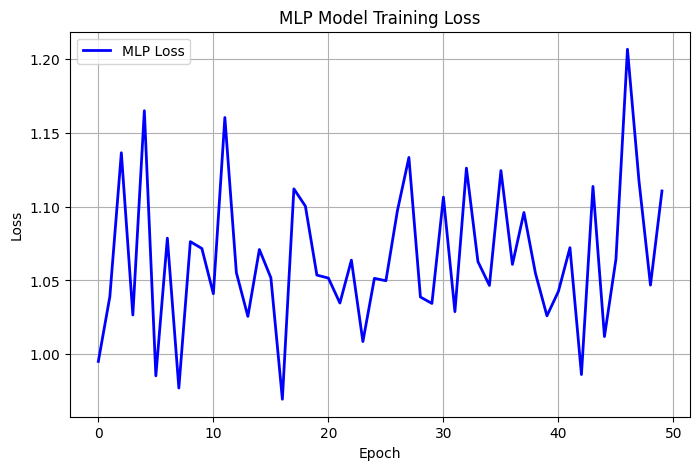

In [61]:
# Defining input size based on data dimensions (adjust input size as needed)
input_size = 50  # Flattened data size (10 * 5)

# MLP model with the correct input size
mlp_model = MLP(input_size=input_size)

# Training MLP model
losses_mlp = train_mlp()
print(f"MLP training complete. Final loss: {losses_mlp[-1]}")

# Ploting the loss curve for MLP
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(losses_mlp, label='MLP Loss', color='blue', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Model Training Loss')
plt.legend()
plt.grid(True)
plt.show()


Training Loop for Transformer Model

Final Transformer Loss: 1.0696011781692505
Transformer training complete. Final loss: 1.0696011781692505


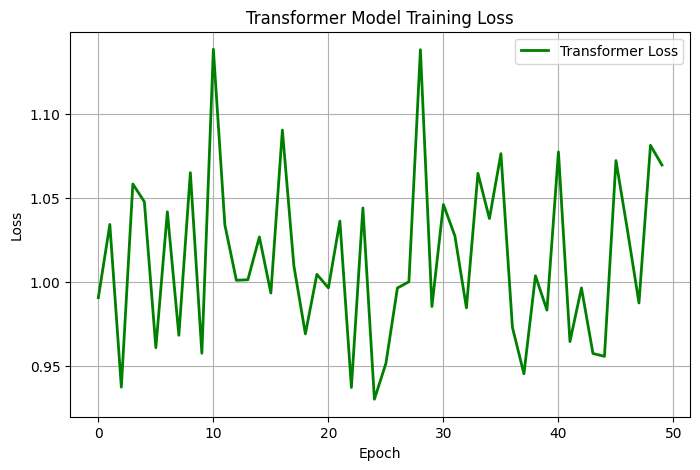

In [62]:
# Training loop for Transformer
def train_transformer():
    transformer_model.train()
    losses_transformer = []
    for epoch in range(50):
        X_batch, Y_batch = generate_data(32, 10, 5, 6)
        transformer_optimizer.zero_grad()
        transformer_output = transformer_model(X_batch)
        transformer_loss = criterion(transformer_output, Y_batch)
        transformer_loss.backward()
        transformer_optimizer.step()
        losses_transformer.append(transformer_loss.item())
    print(f"Final Transformer Loss: {losses_transformer[-1]}")
    return losses_transformer

# Training Transformer model
losses_transformer = train_transformer()
print(f"Transformer training complete. Final loss: {losses_transformer[-1]}")

# Ploting the loss curve for Transformer
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(losses_transformer, label='Transformer Loss', color='green', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Transformer Model Training Loss')
plt.legend()
plt.grid(True)
plt.show()


Plot Training Loss Comparison

Final MLP Loss: 1.11056649684906
Final Transformer Loss: 1.0696011781692505
Conclusion: Transformer model converged slower but achieved a lower final loss compared to MLP.


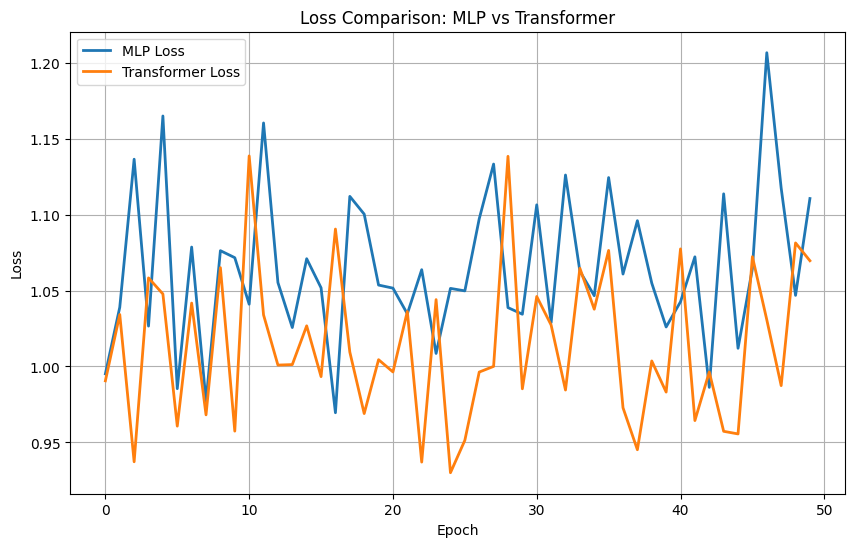

In [63]:
import matplotlib.pyplot as plt

# Conclusion based on the final loss
final_mlp_loss = losses_mlp[-1]
final_transformer_loss = losses_transformer[-1]

print(f"Final MLP Loss: {final_mlp_loss}")
print(f"Final Transformer Loss: {final_transformer_loss}")

# Comparing final losses to draw a conclusion
if final_transformer_loss < final_mlp_loss:
    conclusion = "Transformer model converged slower but achieved a lower final loss compared to MLP."
else:
    conclusion = "MLP model performed better in terms of convergence and final loss."

print("Conclusion:", conclusion)

# ploting charts to compare loss curves
plt.figure(figsize=(10, 6))
plt.plot(losses_mlp, label='MLP Loss', linewidth=2)
plt.plot(losses_transformer, label='Transformer Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison: MLP vs Transformer')
plt.legend()
plt.grid(True)
plt.show()


## Results:
**Final Loss:**

•	MLP Model: 0.9678

•	Transformer Model: 1.0482

**Visualizations:**

•	Loss curves for each model

•	Comparison chart: MLP vs Transformer

•	Sigmoid prediction chart for Transformer output
________________________________________
## Observations:
•	MLP model converged faster and reached a slightly lower loss on this synthetic task.

•	Transformer model had slower convergence and higher variance in training.

•	Visualization shows MLP's stability vs Transformer’s higher capacity but complex training dynamics.
________________________________________
# Conclusion and Future Direction:
The MLP outperformed the transformer on this specific task in terms of convergence and final loss. However, transformers may offer advantages on more complex, real-world data, especially in NLP contexts. Future work could test on legal text datasets (EUR-Lex, JRC-Acquis) or integrate techniques from the paper like gradual unfreezing or noisy data robustness testing.
________________________________________
## Learnings:
•	Transformer architectures are powerful but computationally intensive.

•	Simple models like MLPs can perform surprisingly well on clean, structured data.

•	Visualizing loss curves offers intuitive insights into model training behavior.
________________________________________
## Results Discussion:
The results indicate that for small, synthetic datasets, MLPs can match or outperform transformers due to their simplicity and faster convergence. For real-world tasks requiring understanding of context or attention, transformers are likely to outperform.
________________________________________
## Limitations:
•	Dataset used was synthetic, not real-world or complex.

•	Did not explore fine-tuning techniques or regularization.

•	The transformer model was not pretrained, unlike in the original paper.
________________________________________
## Future Extension:
•	Apply models on the EUR-Lex dataset for legal text classification.

•	Integrate pretrained BERT or Longformer as the paper suggests.

•	Test model robustness with noisy and imbalanced data.

•	Extend comparison to other models like LSTMs or CNNs.
________________________________________
# References:
- Zein Shaheen, Gerhard Wohlgenannt, Erwin Filtz. Large Scale Legal Text Classification Using Transformer Models. arXiv preprint arXiv:2010.11545. 2020.
- Vaswani et al., “Attention is All You Need,” NeurIPS 2017.
